In [1]:
import pandas as pd

#Updated donor file, new donors 2008 -2015
file = 'GAdata_bydonor2008_pipe.txt'

#error_bad_lines drops any record with extra delimiters (tabs, here)
#donors = pd.read_csv(file, sep= ',', error_bad_lines=False, index_col='iID')
donors = pd.read_csv(file, sep='|', error_bad_lines=False, index_col='iContactID')


Skipping line 199174: expected 128 fields, saw 129

Skipping line 258189: expected 128 fields, saw 129

Skipping line 477846: expected 128 fields, saw 129

Skipping line 487703: expected 128 fields, saw 130

Skipping line 488292: expected 128 fields, saw 129
Skipping line 488638: expected 128 fields, saw 129

Skipping line 508883: expected 128 fields, saw 129

Skipping line 570933: expected 128 fields, saw 129

Skipping line 574103: expected 128 fields, saw 129
Skipping line 574984: expected 128 fields, saw 129

Skipping line 606825: expected 128 fields, saw 129

Skipping line 636228: expected 128 fields, saw 129

Skipping line 687399: expected 128 fields, saw 130

Skipping line 794761: expected 128 fields, saw 129

Skipping line 819196: expected 128 fields, saw 129

Skipping line 849668: expected 128 fields, saw 129

Skipping line 856968: expected 128 fields, saw 129

Skipping line 878954: expected 128 fields, saw 129

Skipping line 902640: expected 128 fields, saw 130
Skipping line 9

Data Set description: all donors whose first gift occured between 2008 and 2015 to any one of 5 main channels: Direct Mail, Online (NM), State Party, Finance, or the Online Store

In [2]:
donors.head()

,sCity,sState,sZip,sEmail,sEmployer,sOccupation,mHPCFive,mHPCLT,iNumLifetime,mSumLifetime,...,amt_st_2014_gifts,amt_st_2015_gifts,avg_gift,avg_dm_gift,avg_fi_gift,avg_nm_gift,avg_sp_gift,avg_st_gift,years_on_file,months_on_file
iContactID,,,,,,,,,,,,,,,,,,,,,
359335,New York,NY,10023-8146,bmtk@aol.com,92nd Street Y,Program Administrator,0,50,1,50,...,0,0,50.0000,NaN,NaN,50,NaN,NaN,0,0
664871,Staatsburg,NY,12580-6005,NaN,NaN,Retired,0,25,2,45,...,0,0,22.5000,22.5,NaN,NaN,NaN,NaN,0,5
1917137,Des Moines,IA,50311-3414,NaN,NaN,NaN,20,25,11,145,...,0,0,13.1818,15.0,NaN,NaN,12.7777,NaN,7,85
1966391,Cedar Rapids,IA,52405-5319,jjm56@hotmail.com,NaN,NaN,20,20,4,50,...,0,0,12.5000,12.5,NaN,NaN,NaN,NaN,4,46
2099691,Box Elder,SD,57719-0000,NaN,NaN,Retired,0,50,1,50,...,0,0,50.0000,50.0,NaN,NaN,NaN,NaN,0,0


In [3]:
donors.shape

(2051822, 127)

### Raw file has ??? rows
* Pipe has 2051822 rows able to load. 


In [4]:
donors.years_on_file.describe()

count    2051180.000000
mean           0.887139
std            1.630501
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max            7.000000
Name: years_on_file, dtype: float64

In [5]:
donors.months_on_file.describe()

count    2051177.000000
mean          10.595405
std           19.234434
min            0.000000
25%            0.000000
50%            0.000000
75%           13.000000
max           95.000000
Name: months_on_file, dtype: float64

In [6]:
#avg gift is about $87, but median is only 25
donors.avg_gift.describe()

count    2051496.000000
mean          87.422020
std          929.602814
min        -4745.915000
25%           15.000000
50%           25.000000
75%           42.500000
max        82875.000000
Name: avg_gift, dtype: float64

In [7]:
#donor limit is 30,400 bumped to 32,400 in 2014, now up to 334,000. Need to check these records
describe_cols = ['iNumLifetime', 'mSumLifetime', 'years_on_file', 'months_on_file', 'avg_gift']

high_donor = donors[donors.avg_gift > 32400]

high_donor[describe_cols]

,iNumLifetime,mSumLifetime,years_on_file,months_on_file,avg_gift
iContactID,,,,,
31778727,1,33400,0,0,33400.0000
34652230,2,67800,0,0,33900.0000
33387660,2,66200,0,1,33100.0000
65152045,2,65000,0,0,32500.0000
97088810,2,65500,0,8,32750.0000
57231394,2,65000,0,0,32500.0000
97665644,2,65500,0,3,32750.0000
97671099,1,33100,0,0,33100.0000
97671085,5,168100,4,44,33620.0000


In [19]:
donors.columns

Index([u'sCity', u'sState', u'sZip', u'sEmail', u'sEmployer', u'sOccupation',
       u'mHPCFive', u'mHPCLT', u'iNumLifetime', u'mSumLifetime',
       ...
       u'avg_gift', u'avg_dm_gift', u'avg_fi_gift', u'avg_nm_gift',
       u'avg_sp_gift', u'avg_st_gift', u'years_on_file', u'months_on_file',
       u'all_years_total', u'all_years_dm_total'],
      dtype='object', length=129)

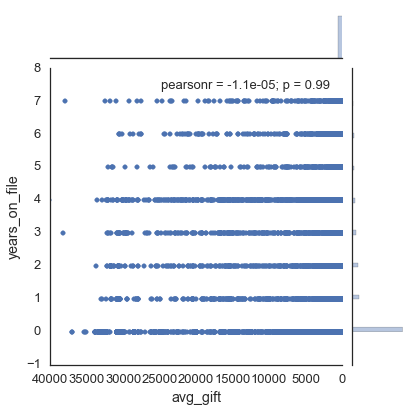

In [82]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

sns.jointplot(data = donors, x='avg_gift', y='years_on_file', kind='scatter', xlim=40000)

In [18]:
#creating indicator vars and aggs

donors['all_years_total'] = donors.num_2008_gifts + donors.num_2009_gifts + donors.num_2010_gifts + donors.num_2011_gifts + donors.num_2012_gifts + donors.num_2013_gifts + donors.num_2014_gifts + donors.num_2015_gifts

donors['all_years_dm_total'] = donors.num_dm_2008_gifts + donors.num_dm_2009_gifts + donors.num_dm_2010_gifts + donors.num_dm_2011_gifts + donors.num_dm_2012_gifts + donors.num_dm_2013_gifts + donors.num_dm_2014_gifts + donors.num_dm_2015_gifts

donors['dm_only_donor'] = donors[(donors.all_years_total==donors.all_years_dm_total) & (donors.all_years_total > 0)]



ValueError: Wrong number of items passed 129, placement implies 1

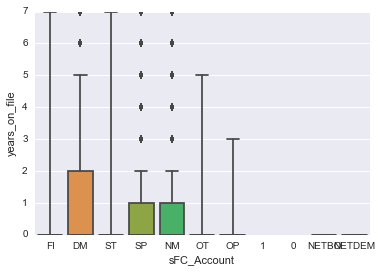

In [12]:
#Graph years on file by account of first gift
sns.boxplot(data=donors, x='sFC_Account', y='years_on_file')

In [30]:
#set date fields as datetime types
#first check date format
donors.dtFC_Date.head()

#then run update, turn non-date into NaT
donors.dtFC_Date = pd.to_datetime(donors.dtFC_Date, errors='coerce')

In [75]:
#create year of first gift var for graphing
donors['dtFC_Year']=donors.dtFC_Date.dt.year.astype(float)

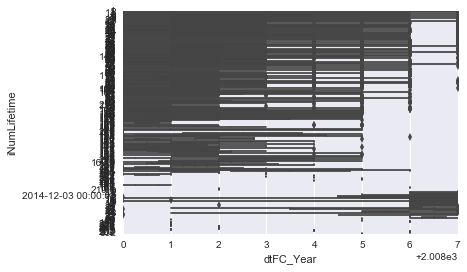

In [41]:
#Graph number of gifts made by year of first gift
sns.boxplot(data=donors, x='dtFC_Year', y='iNumLifetime')

In [71]:
#hmmmm...

#donors.iNumLifetime[donors.iNumLifetime<1]
donors.groupby('iNumLifetime').values


AttributeError: Cannot access attribute 'values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [ ]:
#FOUND BAD ROW:
donors[donors.iNumLifetime == '2014-12-03 00:00:00']

In [61]:
#drop bad row!
donors = donors[donors.iNumLifetime != '2014-12-03 00:00:00']

In [77]:
#still having issues...need all iNumX columns to be floats
donors.dtypes

sCity                         object
sState                        object
sZip                          object
sEmail                        object
sEmployer                     object
sOccupation                   object
mHPCFive                     float64
mHPCLT                       float64
iNumLifetime                  object
mSumLifetime                  object
iNumDMLT                      object
iNumFILT                      object
iNumOnlineLT                  object
iNumTMFour                    object
dtFC_Date             datetime64[ns]
sFC_Account                   object
sFC_Channel                   object
dtMRC_Date                    object
mMRC_Amount                  float64
num_2008_gifts               float64
num_2009_gifts               float64
num_2010_gifts               float64
num_2011_gifts               float64
num_2012_gifts               float64
num_2013_gifts               float64
num_2014_gifts               float64
num_2015_gifts               float64
n

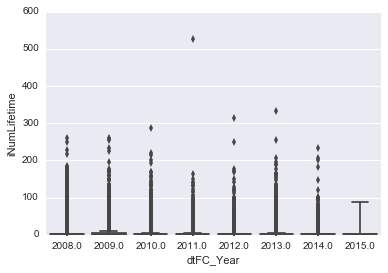

In [78]:
#Graph number of gifts made by year of first gift
sns.boxplot(data=donors, x='dtFC_Year', y='donors['iNumLifetime'].astype(float)')

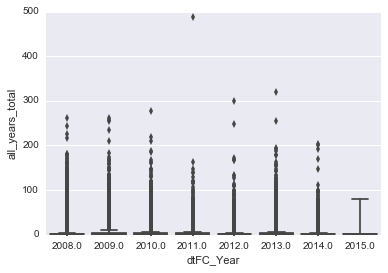

In [79]:
sns.boxplot(data=donors, x='dtFC_Year', y='all_years_total')

In [87]:
sns.boxplot(data=donors, x='dtFC_Year', y=donors[donors.mHPCFive <= 1000])

ValueError: cannot copy sequence with size 130 to array axis with dimension 2044814